<a href="https://colab.research.google.com/github/prajwalDU/Brazilian_ECommerce_Analysis/blob/main/HPLX_PrajwalDU_06_09_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction:**
Working for a large e-commerce store that sells products online. The company has collected data on customer purchases and wants to gain insights into customer preferences and find who their loyal customers and what are their attributes are. Additionally, the company wants to create a model to forecast customer purchases.


# Part 1: Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading dataset
df_customer  = pd.read_csv('/content/drive/MyDrive/Company/archive/olist_customers_dataset.csv')
df_orders_item = pd.read_csv('/content/drive/MyDrive/Company/archive/olist_order_items_dataset.csv')
df_orders_payment = pd.read_csv('/content/drive/MyDrive/Company/archive/olist_order_payments_dataset.csv')
df_order = pd.read_csv('/content/drive/MyDrive/Company/archive/olist_orders_dataset.csv')
df_products = pd.read_csv('/content/drive/MyDrive/Company/archive/olist_products_dataset.csv')
df_sellers_data = pd.read_csv('/content/drive/MyDrive/Company/archive/olist_sellers_dataset.csv')

In [3]:
# Checking first 5 rows of customer dataset
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
df_customer['customer_city'].value_counts()

sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: customer_city, Length: 4119, dtype: int64

In [5]:
# Checking first 5 rows of orders item dataset
df_orders_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
# Checking first 5 rows of orders payment dataset
df_orders_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
payments = df_orders_payment['payment_type'].value_counts()
print(payments)

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64


In [8]:
import plotly.express as px

# Show the booking market segment using pie chart
label=['credit_card','boleto','voucher','debit_card','not_defined']
piechart= px.pie(payments,names=payments.index,values=payments.values,title='Payment Types')
piechart.update_traces(rotation=90,textinfo="percent+label")

In [9]:
# Checking first 5 rows of orders dataset
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
status = df_order['order_status'].value_counts()
print(status)

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64


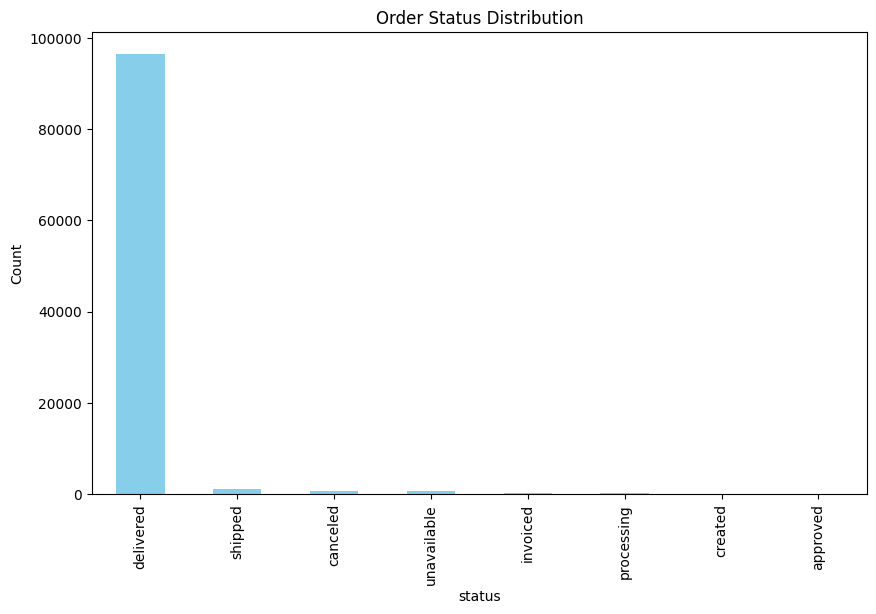

In [11]:
plt.figure(figsize=(10, 6))
status.plot(kind='bar', color='skyblue')
plt.xlabel('status')
plt.ylabel('Count')
plt.title('Order Status Distribution')
plt.show()

In [12]:
# Coverting type of 'order_purchase_timestamp' to datetime
df_order['order_purchase_timestamp'] = pd.to_datetime(df_order['order_purchase_timestamp'])

# Creating new features
df_order['Date'] = df_order['order_purchase_timestamp'].dt.date
df_order['Year'] = df_order['order_purchase_timestamp'].apply(lambda x : x.year)
df_order['Month'] = df_order['order_purchase_timestamp'].apply(lambda x : x.month_name())
df_order['Day'] = df_order['order_purchase_timestamp'].apply(lambda x : x.day_name())
df_order['Hour'] = df_order['order_purchase_timestamp'].apply(lambda x : x.hour)

In [13]:
# Checking first 5 rows of products dataset
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [14]:
# Checking first 5 rows of orders dataset
df_sellers_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [15]:
# Creating a merged DataFrame
df_final = pd.merge(left=df_orders_item,
                  right=df_order[['customer_id', 'order_purchase_timestamp', 'order_id', 'Date', 'Year', 'Month', 'Day', 'Hour']],
                  how='left', on="order_id")

df_final = pd.merge(left=df_final, right=df_orders_payment[['payment_type', 'order_id']],
                  how='left', on="order_id")

df_final = pd.merge(left=df_final,
                  right=df_sellers_data[['seller_id','seller_city', 'seller_state']],
                  how='left', on='seller_id')

df_final = pd.merge(left=df_final,
                  right=df_customer[['customer_id', 'customer_city', 'customer_state']],
                  how='left', on='customer_id')

df_final = pd.merge(left=df_final,
                  right=df_products[['product_id','product_category_name']],
                  how='left', on='product_id')

df_final = df_final.drop(["order_id","product_id","seller_id","shipping_limit_date", "freight_value"],
                       axis=1)

In [16]:
# Check the duplicates in dataset
len(df_final[df_final.duplicated()])

2466

We have 2466 duplicates values in our dataset we as to drop it before starting analysis

In [17]:
# Print the shape of dataset before removing duplicate
print('The shape of dataset before removing duplicate :', df_final.shape)

# Dropping duplicate
df_final.drop_duplicates(inplace=True)

# Print the shape of dataset after removing duplicate
print('The shape of dataset after removing duplicate :', df_final.shape)

The shape of dataset before removing duplicate : (117604, 15)
The shape of dataset after removing duplicate : (115138, 15)


In [18]:
# Check the missing values
missing = df_final.columns[df_final.isnull().any()].tolist()

# Print the missing values in dataset
print('Missing Data count')
print(df_final[missing].isnull().sum().sort_index(ascending=False))
# Print the percentage of missing data
print('Missing Data Percentage')
print(round(df_final[missing].isnull().sum().sort_index(ascending=False)/len(df_final)*100,2))

Missing Data count
product_category_name    1645
payment_type                3
dtype: int64
Missing Data Percentage
product_category_name    1.43
payment_type             0.00
dtype: float64


In [19]:
# Check the info of dataset
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115138 entries, 0 to 117603
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_item_id             115138 non-null  int64         
 1   price                     115138 non-null  float64       
 2   customer_id               115138 non-null  object        
 3   order_purchase_timestamp  115138 non-null  datetime64[ns]
 4   Date                      115138 non-null  object        
 5   Year                      115138 non-null  int64         
 6   Month                     115138 non-null  object        
 7   Day                       115138 non-null  object        
 8   Hour                      115138 non-null  int64         
 9   payment_type              115135 non-null  object        
 10  seller_city               115138 non-null  object        
 11  seller_state              115138 non-null  object        
 12  cu

In [20]:
df_final['TimeType'] = np.where((df_final["Hour"]>5)&(df_final["Hour"]<18), np.where(
                           df_final["Hour"]<12, 'Morning','Afternoon'),'Evening')

In [21]:
df_final.head()

,order_item_id,price,customer_id,order_purchase_timestamp,Date,Year,Month,Day,Hour,payment_type,seller_city,seller_state,customer_city,customer_state,product_category_name,TimeType
0,1,58.90,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-13,2017,September,Wednesday,8,credit_card,volta redonda,SP,campos dos goytacazes,RJ,cool_stuff,Morning
1,1,239.90,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-04-26,2017,April,Wednesday,10,credit_card,sao paulo,SP,santa fe do sul,SP,pet_shop,Morning
2,1,199.00,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-14,2018,January,Sunday,14,credit_card,borda da mata,MG,para de minas,MG,moveis_decoracao,Afternoon
3,1,12.99,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-08,2018,August,Wednesday,10,credit_card,franca,SP,atibaia,SP,perfumaria,Morning
4,1,199.90,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-02-04,2017,February,Saturday,13,credit_card,loanda,PR,varzea paulista,SP,ferramentas_jardim,Afternoon


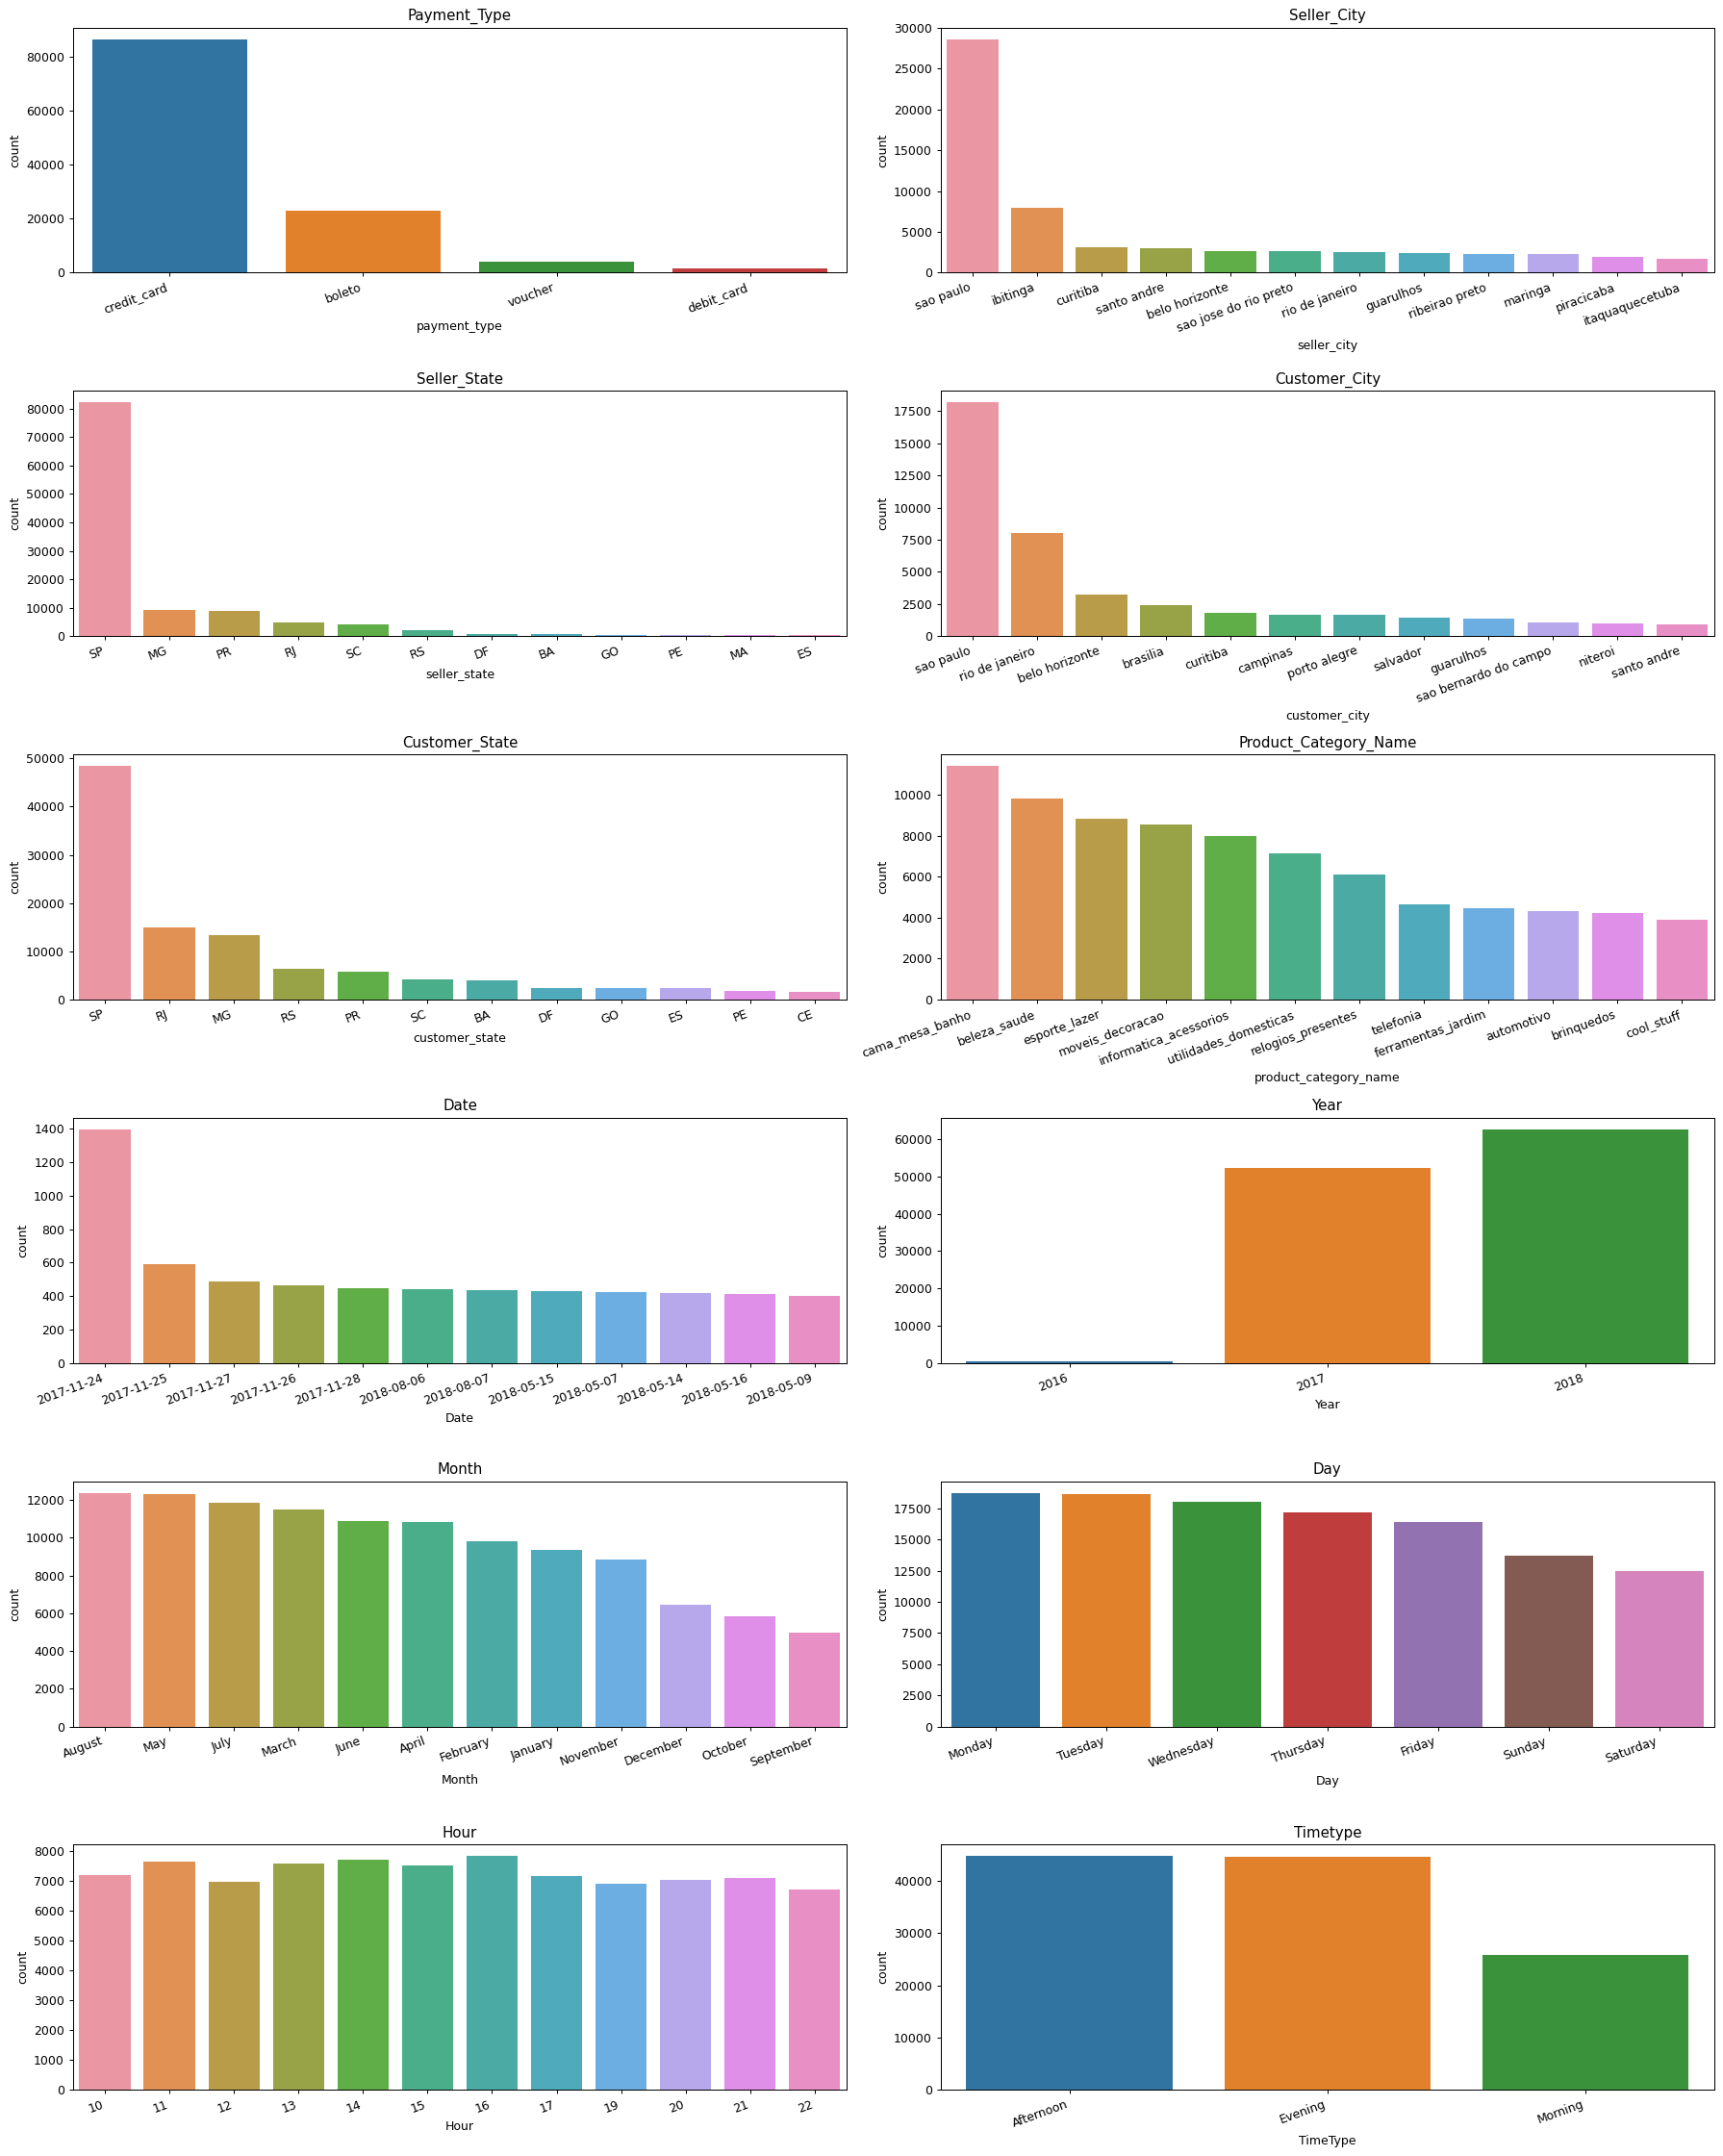

In [22]:
# Ploting top values based on frequency in each column
column = ['payment_type', 'seller_city','seller_state', 'customer_city', 'customer_state',
          'product_category_name','Date', 'Year', 'Month','Day','Hour','TimeType']

plt.figure(figsize=(20,25), dpi=90)
for n,col in enumerate(column):
  plt.subplot(6,2,n+1)
  temp = df_final[col].value_counts().reset_index().head(12)
  temp.rename(columns={'index' : col, col:'count'}, inplace=True)
  sns.barplot(x=col, y='count', data=temp).set(title=col.title())
  plt.xticks(rotation=20, ha='right')
  plt.tight_layout()

In [23]:
# Print order placed country
state_wise_customer = df_final.groupby('customer_state').nunique()['customer_id'].reset_index().sort_values('customer_id', ascending=False)
state_wise_customer.rename(columns={'customer_id':'Customer_count'}, inplace=True)
state_wise_customer.head()

,customer_state,Customer_count
25,SP,41375
18,RJ,12762
10,MG,11544
22,RS,5432
17,PR,4998


In [24]:
# Amount wise item purchases
product_price = df_final.groupby("product_category_name").sum()["price"].reset_index().sort_values("price",ascending=False)
product_price.head()

<ipython-input-24-983af3ab0098>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,product_category_name,price
11,beleza_saude,1278369.69
66,relogios_presentes,1232750.45
13,cama_mesa_banho,1061197.64
32,esporte_lazer,1005399.69
44,informatica_acessorios,927809.55


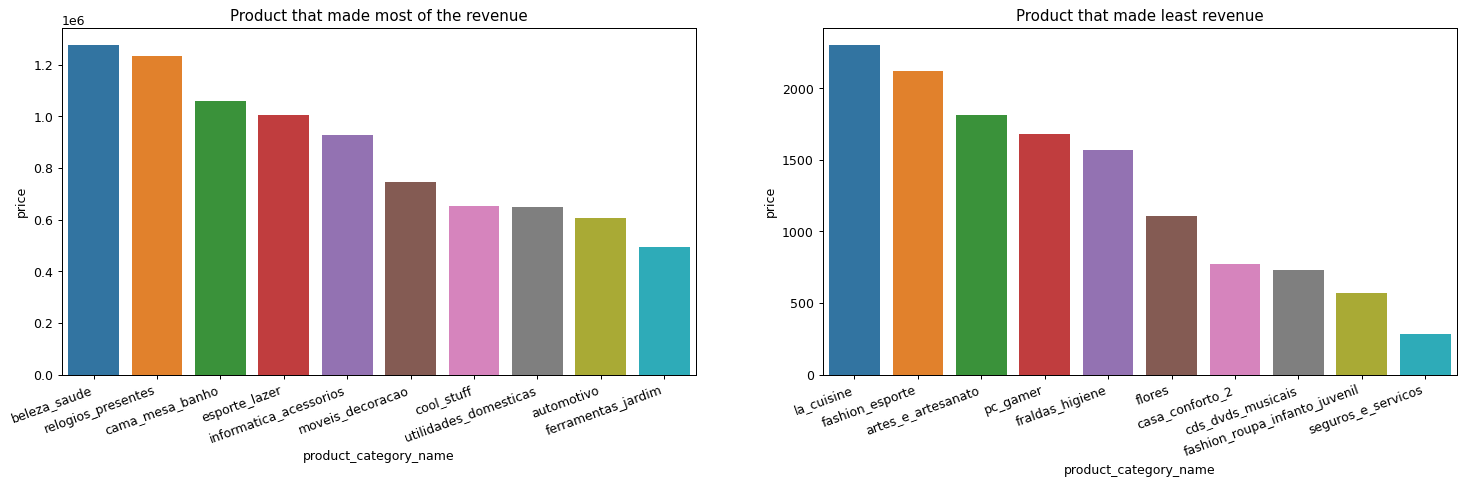

In [25]:
# Visualizing top and bottom 10 products based on amount
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product that made most of the revenue")
sns.barplot(data=product_price.head(10),x="product_category_name",y="price")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product that made least revenue")
sns.barplot(data=product_price.tail(10),x="product_category_name",y="price")
plt.show()

In [26]:
df_final.head()

,order_item_id,price,customer_id,order_purchase_timestamp,Date,Year,Month,Day,Hour,payment_type,seller_city,seller_state,customer_city,customer_state,product_category_name,TimeType
0,1,58.90,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-13,2017,September,Wednesday,8,credit_card,volta redonda,SP,campos dos goytacazes,RJ,cool_stuff,Morning
1,1,239.90,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-04-26,2017,April,Wednesday,10,credit_card,sao paulo,SP,santa fe do sul,SP,pet_shop,Morning
2,1,199.00,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-14,2018,January,Sunday,14,credit_card,borda da mata,MG,para de minas,MG,moveis_decoracao,Afternoon
3,1,12.99,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-08,2018,August,Wednesday,10,credit_card,franca,SP,atibaia,SP,perfumaria,Morning
4,1,199.90,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-02-04,2017,February,Saturday,13,credit_card,loanda,PR,varzea paulista,SP,ferramentas_jardim,Afternoon


# Part 2: Predictive Modeling

In [27]:
!pip install calmap

In [28]:
!pip install pmdarima

In [29]:
import tensorflow as tf
from IPython.display import display
from keras.layers import LSTM, Dense
from keras import Sequential
from keras.backend import clear_session
from keras.callbacks import EarlyStopping
from keras.preprocessing.sequence import TimeseriesGenerator
from pmdarima.arima import ARIMA as pmdARIMA
from pmdarima.arima import ADFTest, KPSSTest, auto_arima
from pmdarima.utils import diff_inv
from scipy.special import boxcox1p, inv_boxcox1p
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import STL
from tensorflow.keras.optimizers import Adam

In [30]:
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Date,Year,Month,Day,Hour
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02,2017,October,Monday,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24,2018,July,Tuesday,20
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08,2018,August,Wednesday,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18,2017,November,Saturday,19
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13,2018,February,Tuesday,21


In [31]:
df_orders_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [32]:
df_geolocation = pd.read_csv('/content/drive/MyDrive/Company/archive/olist_geolocation_dataset.csv')

df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [33]:
df_order['order_delivered_carrier_date'] = pd.to_datetime(df_order['order_delivered_carrier_date']) # datetime conversion
payments = df_orders_payment.set_index('order_id') # preparation before the join
orders = df_order.set_index('order_id') # preparation before the join

joined = orders.join(df_orders_payment) # join on order_id

In [34]:
#checking null values
joined.isna()\
      .sum()\
      .sort_values(ascending=False)

payment_value                    99441
payment_installments             99441
payment_type                     99441
payment_sequential               99441
order_id                         99441
order_delivered_customer_date     2965
order_delivered_carrier_date      1783
order_approved_at                  160
Day                                  0
Hour                                 0
customer_id                          0
Month                                0
order_status                         0
Date                                 0
order_estimated_delivery_date        0
order_purchase_timestamp             0
Year                                 0
dtype: int64

In [35]:
#checking nunique values
joined.nunique()\
      .sort_values(ascending=False)

customer_id                      99441
order_purchase_timestamp         98875
order_delivered_customer_date    95664
order_approved_at                90733
order_delivered_carrier_date     81018
Date                               634
order_estimated_delivery_date      459
Hour                                24
Month                               12
order_status                         8
Day                                  7
Year                                 3
order_id                             0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
dtype: int64

In [41]:
joined.drop(columns=['order_id'], inplace=True)

In [42]:
last_date = joined['order_delivered_carrier_date'].max() + pd.to_timedelta(1, 'D')

RFM = joined.dropna(subset=['order_delivered_carrier_date'])\
            .reset_index()\
            .groupby('customer_id')\
            .agg(Recency = ('order_delivered_carrier_date', lambda x: (last_date - x.max()).days ),
                 Frequency = ('order_id', 'size'),
                 Monetary = ('payment_value', 'sum'))

In [43]:
RFM.describe([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Recency,97658.0,250.511847,152.674579,1.0,21.0,35.0,54.0,127.0,231.0,361.0,478.0,532.0,587.0,704.0
Frequency,97658.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Monetary,97658.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


So, here we can see that we have some outliers in Freqency and Monetary groups. Thus, they should be dropped and be analyzed separately

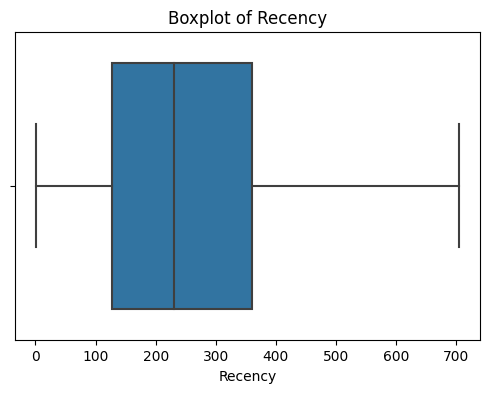

In [44]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Recency', data=RFM)
plt.title('Boxplot of Recency');

In [45]:
RFM['Frequency'].value_counts(normalize=True)*100

1    100.0
Name: Frequency, dtype: float64

In [46]:
RFM['Frequency'].apply(lambda x: 'less or equal to 5' if x<=5 else 'greater than 5')\
                .value_counts(normalize=True) * 100

less or equal to 5    100.0
Name: Frequency, dtype: float64

In [47]:
RFM['Monetary'].describe([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    97658.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
90%          0.0
95%          0.0
99%          0.0
max          0.0
Name: Monetary, dtype: float64

**RFM groups**

I have used quantiles for assigning scores for Recency and Monetary.

groups are 0-33, 33-66, 66-100 quantiles
For Frequency I have decided to group them by hand

score=1 if the frequency value is 1
otherwise, the score will be 2

In [ ]:
# Calculating R, F and M scores by splitting Recency, Frequency	and Monetary based on quantiles
#RFM['R'] = pd.qcut(RFM['Recency'], q=4, labels=[4,3,2,1], duplicates='drop').astype(int)
#RFM['F'] = pd.qcut(RFM['Frequency'], q=4, labels=[1,2,3,4], duplicates='drop').astype(int)
#RFM['M'] = pd.qcut(RFM['Monetary'], q=4, labels=[1,2,3,4], duplicates='drop').astype(int)

# Finding the rfm group for each customer by combining the factor R, F and M
RFM['RFM'] = 100*RFM['R'] + 10*RFM['F'] + RFM['M']

# Finding the rfm group for each customer by adding the factor R, F and M
RFM['RFM_score'] = RFM['R'] + RFM['F'] + RFM['M']



1.  CORE - '123' - most recent, frequent, revenue generating - core customers that should be considered as most valuable clients
2.  GONE - '311', '312', '313' - gone, one-timers - those clients are probably gone;


3.   ROOKIE - '111', '112', '113' - just have joined - new clients that have joined recently
4.  WHALES - '323', '213', '223 - most revenue generating - whales that generate revenue









5.   LOYAL - '221', '222', '321', '322' - loyal users
6.  REGULAR - '121', '122', '211', '212', - average users - just regular customers that don't stand out





In [50]:
def segment(x):
    if x == '123':
        return 'Core'
    elif x in ['311', '312', '313']:
        return 'Gone'
    elif x in ['111', '112', '113']:
        return 'Rookies'
    elif x in ['323', '213', '223']:
        return 'Whales'
    elif x in ['221', '222', '321', '322']:
        return 'Loyal'
    else:
        return 'Regular'

In [ ]:
RFM['segments'] = RFM['RFM_score'].apply(segment)
RFM['segments'].value_counts(normalize=True)*100

# Part 3: Natural Language Processing (NLP)

In [38]:
# importing libaries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [39]:
# Importing dataset
df_review  = pd.read_csv('/content/drive/MyDrive/Company/archive/olist_order_reviews_dataset.csv')

df_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [42]:
# Check the duplicates in dataset
len(df_review[df_review.duplicated()])

0

In [41]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [45]:
# Check the missing values
missing = df_review.columns[df_review.isnull().any()].tolist()

# Print the missing values in dataset
print('Missing Data count')
print(df_review[missing].isnull().sum().sort_index(ascending=False))
# Print the percentage of missing data
print('Missing Data Percentage')
print(round(df_review[missing].isnull().sum().sort_index(ascending=False)/len(df_review)*100,2))

Missing Data count
review_comment_title      87656
review_comment_message    58247
dtype: int64
Missing Data Percentage
review_comment_title      88.34
review_comment_message    58.70
dtype: float64


AS we seen 'review_comment_title' consist 88% null values so we treat them "NA"

In [46]:
df_review['review_comment_title'].fillna('NA', inplace=True)
df_review['review_comment_message'].fillna('NA', inplace=True)

In [47]:
df_review.shape

(99224, 7)

In [49]:
# Preprocess the text data
# (Tokenization, Lowercasing, TF-IDF Vectorization)
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
X = tfidf_vectorizer.fit_transform(df_review['review_comment_message'].fillna(''))

# Define the target variable
y = df_review['review_score']

In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Create and train the classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [52]:
# Make predictions
y_pred = classifier.predict(X_test)

In [53]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6458553791887125
              precision    recall  f1-score   support

           1       0.58      0.69      0.63      2313
           2       0.00      0.00      0.00       690
           3       0.38      0.01      0.03      1645
           4       0.43      0.02      0.04      3836
           5       0.66      0.98      0.79     11361

    accuracy                           0.65     19845
   macro avg       0.41      0.34      0.30     19845
weighted avg       0.56      0.65      0.54     19845



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

